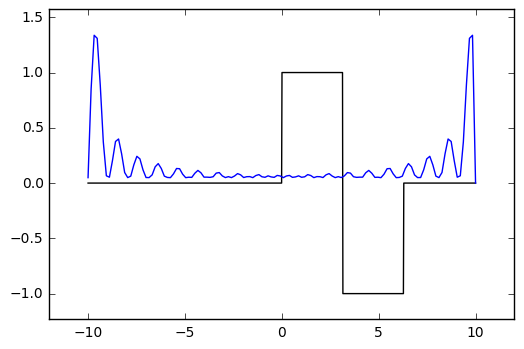

In [42]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def theOriginalFunction(var,period):
    return np.piecewise(var, [((var >= 0)*(var < period/2)), ((var >= period/2)*(var < period))], [1, -1])

def innerSum(j,Yn,N):
    inner = np.array([Yn[n]*np.exp(-2*np.pi*1j*j*n/N) for n in range((-N/2)+1,N/2)])
    return inner.sum()
    
    #total = 0
    #for n in range (1, N):
    #    total = total + (Yn[n]*np.exp(-2*np.pi*1j*((j*n)/N)))    
    #return total

# Generate a function with period L
L = 2*np.pi
x = np.linspace(-10, 10, 1000)
y = theOriginalFunction(x,L)

#Generate the corresponding discrete Fourier transform
N = 128
xn = np.linspace(-10, 10, N)
Yn = theOriginalFunction(xn,L)

#myTest = innerSum(j,Yn,N) 
#print myTest
#Cj = np.array([innerSum(j,Yn,N).imag for j in range(0, N-1)])

Cj = np.empty(N) + 1j * np.empty(N)
for j in range(0, N-1):
    Cj[j] = (L/N)*innerSum(j,Yn,N)

Cj_abs = np.sqrt(Cj.real**2 + Cj.imag**2)

#Generate the plot
plt.plot(x, y, 'k-')
#plt.plot(xn, Cj.real)
#plt.plot(xn, Cj.imag)
plt.plot(xn, Cj_abs)
plt.margins(0.1)
plt.show()


In [44]:
Cj_abs[:10]

array([ 0.04908739,  0.84928615,  1.3371232 ,  1.30948013,  0.88687888,
        0.37174533,  0.06590409,  0.05315966,  0.20369469,  0.37629597])

In [45]:
Cj_abs[-10:]

array([ 0.3988357 ,  0.37629597,  0.20369469,  0.05315966,  0.06590409,
        0.37174533,  0.88687888,  1.30948013,  1.3371232 ,  0.        ])